# Anàlisi d'autocorrelació per a temperatures

En primer lloc, es realitza una anàlisi de dades de temperatura. S'utilitzen les dades de l'estació
meteorològica del MeteoCat de Terrassa. Les dades són semi horàries, això vol dir que s'obté una mesura
cada 30 minuts.

La seqüència d'accions és:
- Carregar el conjunt de dades a pandas.
- Visualització de la temperatura.
- Càlcul de l'autocorrelació a diferents nivells (lags) k.
- Interpretació dels resultats.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import autocorrelation_plot

# Using the Terrassa meteo database from 2025-01-01 00:00:00 to 2025-01-07 23:30:00
# Load the dataset
data = pd.read_csv('meteo-terrassa.csv')
data.rename(columns={'Data': 'date', 'Temperatura': 'temperature'}, inplace=True)
data['date'] = pd.to_datetime(data['date'])
# Show first few rows
data.head()

,date,temperature,Tmaxima,Tminima,HR,Precipitacio,Vent,Direccio,RatxaMaxima,Irradiancia
0,2025-01-01 00:00:00,7.0,7.2,6.8,100,0.0,4.7,293,9.7,0
1,2025-01-01 00:30:00,5.7,6.8,5.1,100,0.0,4.0,236,7.2,0
2,2025-01-01 01:00:00,4.9,5.1,4.6,100,0.0,3.6,240,5.4,0
3,2025-01-01 01:30:00,4.6,4.7,4.5,100,0.0,3.2,251,6.5,0
4,2025-01-01 02:00:00,4.3,4.5,4.0,100,0.0,3.6,265,6.1,0


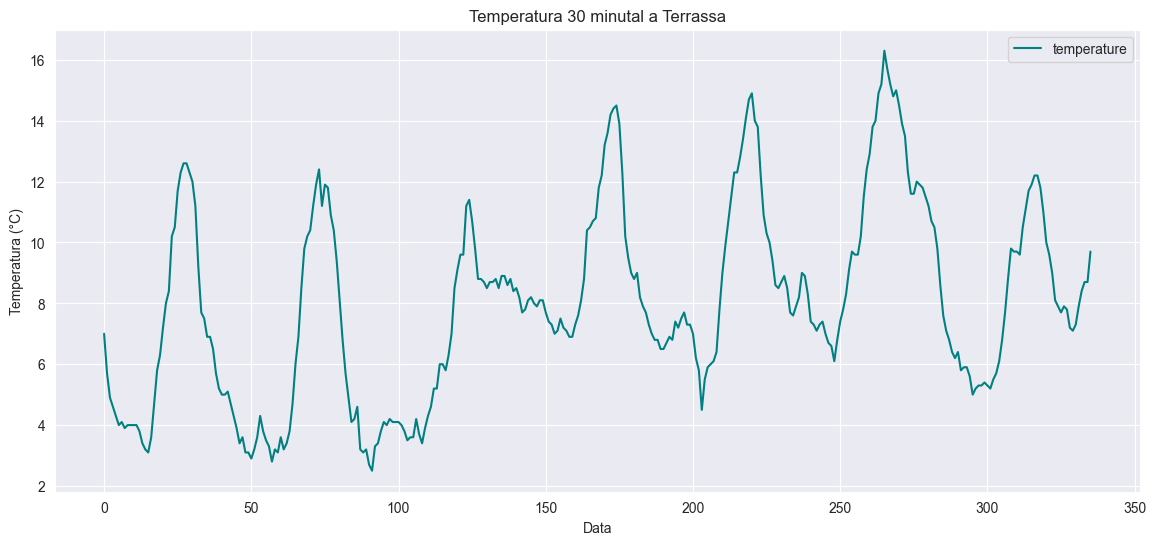

In [2]:
# Plot the temperature data
data[['temperature']].plot(figsize=(14, 6), title='Temperatura 30 minutal a Terrassa', color='teal')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.show()

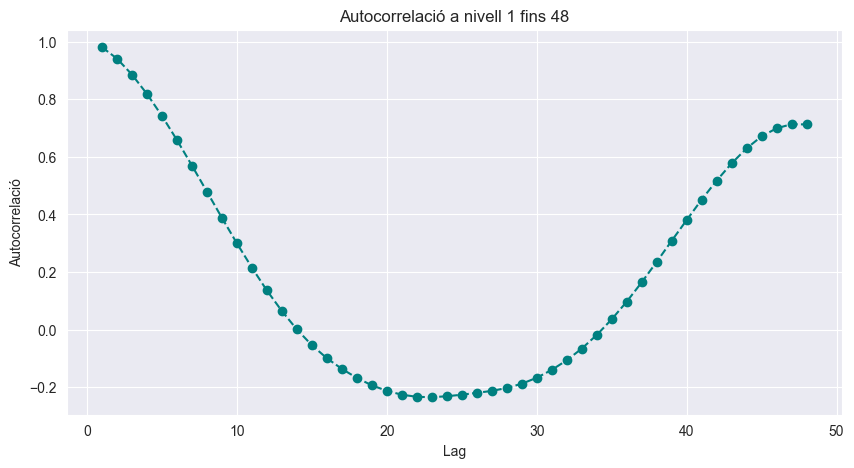

In [3]:
# Compute autocorrelations for lags 1 to 48
lags = range(1, 49)
autocorr_values = [data['temperature'].autocorr(lag=lag) for lag in lags]

# Put into a DataFrame
autocorr_df = pd.DataFrame({
    'lag': lags,
    'autocorrelation': autocorr_values
})
# Plot the autocorrelation data frame
plt.figure(figsize=(10, 5))
plt.plot(autocorr_df['lag'], autocorr_df['autocorrelation'], linestyle='--', marker='o', color='teal')
plt.title('Autocorrelació a nivell 1 fins 48')
plt.xlabel('Lag')
plt.ylabel('Autocorrelació')
plt.grid(True)
plt.show()

En el gràfic d'autocorrelació s'observa:
- Un valor molt proper a 1 per a nivell 1, 2, 3 significa que la temperatura actual està correlada amb la temperatura de fa 30, 60  i 90 minuts.
- Un descens gradual en l'autocorrelació indica persistència en les dades.
- Valors alts de nou en l'autocorrelació en nivells propers a 48 indica que hi ha també correlació d'un dia a l'altre.

Addicionalment, es pot fer un test de Ljung-Box

El test de Ljung-Box comprova si un grup d'autocorrelacions és conjuntament zero.
- Un valor p petit (p-value < 0,05) suggereix una autocorrelació significativa fins a un nivell de 48.

Si voleu més informació sobre el test Ljung-Box:
- [Wikipèdia](https://en.wikipedia.org/wiki/Ljung%E2%80%93Box_test)
- [Llibreria statsmodels de python](https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.acorr_ljungbox.html)

In [25]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Test autocorrelation up to lag 48
ljung_box_results = acorr_ljungbox(data[['temperature']], lags=[48], return_df=True)
ljung_box_results

,lb_stat,lb_pvalue
49,3184.248693,0.0


# Anàlisi d'autocorrelació per valors a l'atzar

Seguidament, es realitza la mateixa anàlisi de dades, però ara les dades es generen amb valors de 0 a 99 a l'atzar.

La seqüència d'accions és:
- Generar un conjunt de valors a l'atzar en un DataFrame de pandas.
- Visualització de les dades.
- Càlcul de l'autocorrelació a diferents nivells (lags) k.
- Interpretació dels resultats.


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import autocorrelation_plot

# Using the Terrassa meteo database from 2025-01-01 00:00:00 to 2025-01-07 23:30:00
# Load the dataset
data = pd.DataFrame(np.random.randint(0, 100, size=1000))
# Show first few rows
data.head()

,0
0,49
1,29
2,36
3,87
4,57


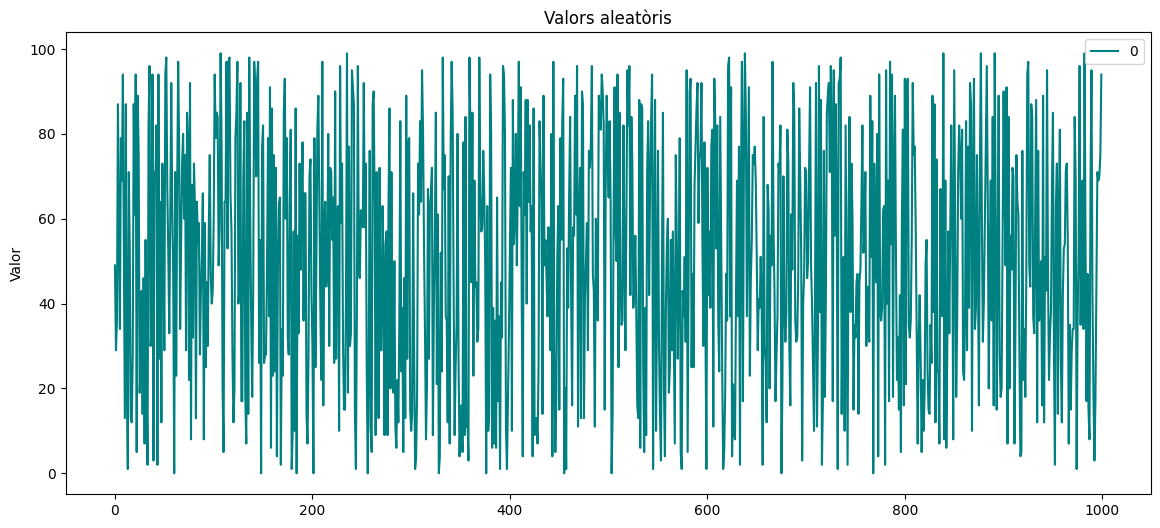

In [30]:
# Plot the random data
data.plot(figsize=(14, 6), title='Valors aleatòris', color='teal')
plt.ylabel('Valor')
plt.show()

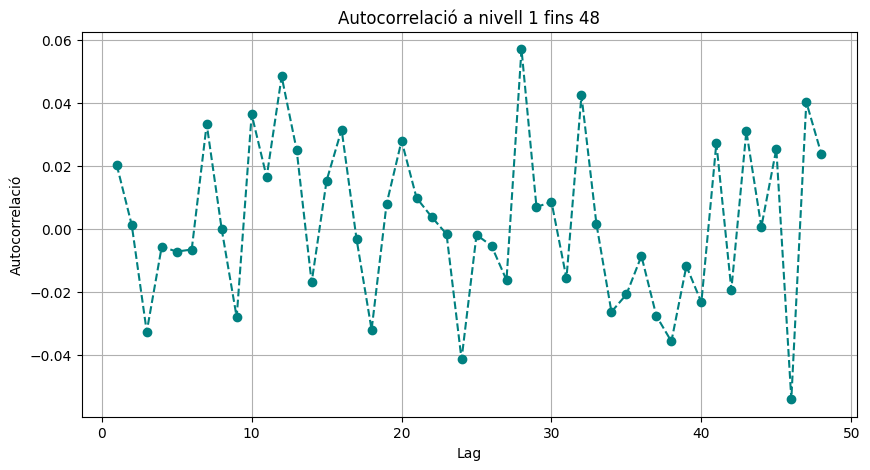

In [32]:
# Compute autocorrelations for lags 1 to 48
lags = range(1, 49)
autocorr_values = [data[0].autocorr(lag=lag) for lag in lags]

# Put into a DataFrame
autocorr_df = pd.DataFrame({
    'lag': lags,
    'autocorrelation': autocorr_values
})
# Plot the autocorrelation data frame
plt.figure(figsize=(10, 5))
plt.plot(autocorr_df['lag'], autocorr_df['autocorrelation'], linestyle='--', marker='o', color='teal')
plt.title('Autocorrelació a nivell 1 fins 48')
plt.xlabel('Lag')
plt.ylabel('Autocorrelació')
plt.grid(True)
plt.show()

En el gràfic d'autocorrelació s'observa:
- Valors molt petits a tots els nivells indiquen que no hi ha autocorrelació entre les dades

In [34]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Test autocorrelation up to lag 48
ljung_box_results = acorr_ljungbox(data[0], lags=[48], return_df=True)
ljung_box_results

,lb_stat,lb_pvalue
48,29.913342,0.981104


Fent el test de Ljung-Box
- Un valor p molt gran suggereix que no hi ha autocorrelació significativa fins a un nivell de 48.